# CLASSIFICATION: PREPARING AND ANALYZING DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

#file_path = '/content/drive/MyDrive/SEM 2/NLP/GP/final_v2.csv'

#try:
 # final_v2 = pd.read_csv(file_path)
  #print("File loaded successfully.")
#except FileNotFoundError:
 # print(f"Error: File not found at {file_path}. Please check the file path.")
#except pd.errors.ParserError:
 # print(f"Error: Could not parse the CSV file at {file_path}. Please check the file format.")
#except Exception as e:
 # print(f"An unexpected error occurred: {e}")

final_v2 = pd.read_csv('data/final_v2.csv')

Mounted at /content/drive
File loaded successfully.


In [ ]:
final_v2.head()

,date,title,description,text,author,country,clean_text,current_rate,next_rate,next_rate_date,rate_difference,previous_rate,rate_change_direction,days_to_next_decision,quarter,year,role
0,1999-01-03 00:00:00,Mr Ferguson reviews last year's economic perfo...,"Remarks by Mr Roger W. Ferguson, Jr., a member...",Mr Ferguson reviews last year's economic perfo...,Roger W Ferguson,United States,"Remarks by Mr Roger W. Ferguson, Jr., a member...",4.63,4.76,1999-02-01,0.13,NaN,no change,29.0,1,1999,governor
1,1999-01-07 00:00:00,Mr Duisenberg's opening statement at the press...,Introductory statement by the President of the...,Mr Duisenberg's opening statement at the press...,Willem F Duisenberg,Euro area,Introductory statement by the President of the...,3.00,2.50,1999-04-09,-0.50,NaN,no change,92.0,1,1999,president
2,1999-01-14 00:00:00,Mr Duisenberg discusses the arrival of the eur...,Speech by the President of the European Centra...,Mr Duisenberg discusses the arrival of the eur...,Willem F Duisenberg,Euro area,Speech by the President of the European Centra...,3.00,2.50,1999-04-09,-0.50,3.00,no change,85.0,1,1999,president
3,1999-01-15 00:00:00,Mr Ferguson expresses his views on monetary po...,"Remarks by Mr Roger W. Ferguson, Jr., a member...",Mr Ferguson expresses his views on monetary po...,Roger W Ferguson,United States,"Remarks by Mr Roger W. Ferguson, Jr., a member...",4.63,4.76,1999-02-01,0.13,4.63,no change,17.0,1,1999,governor
4,1999-01-18 00:00:00,Mr Duisenberg's opening statement at the Europ...,Introductory statement by the President of the...,Mr Duisenberg's opening statement at the Europ...,Willem F Duisenberg,Euro area,Introductory statement by the President of the...,3.00,2.50,1999-04-09,-0.50,3.00,no change,81.0,1,1999,president


In [ ]:
import pandas as pd
import numpy as np

# Convert 'date' and 'next_rate_date' to datetime objects if they aren't already
final_v2['date'] = pd.to_datetime(final_v2['date'])
final_v2['next_rate_date'] = pd.to_datetime(final_v2['next_rate_date'])

# Calculate the difference in days
final_v2['days_to_next_decision'] = (final_v2['next_rate_date'] - final_v2['date']).dt.days

# Fill NaN values in 'days_to_next_decision' with the calculated difference
final_v2['days_to_next_decision'].fillna(final_v2['days_to_next_decision'], inplace=True)



print(final_v2.head())


        date                                              title  \
0 1999-01-03  Mr Ferguson reviews last year's economic perfo...   
1 1999-01-07  Mr Duisenberg's opening statement at the press...   
2 1999-01-14  Mr Duisenberg discusses the arrival of the eur...   
3 1999-01-15  Mr Ferguson expresses his views on monetary po...   
4 1999-01-18  Mr Duisenberg's opening statement at the Europ...   

                                         description  \
0  Remarks by Mr Roger W. Ferguson, Jr., a member...   
1  Introductory statement by the President of the...   
2  Speech by the President of the European Centra...   
3  Remarks by Mr Roger W. Ferguson, Jr., a member...   
4  Introductory statement by the President of the...   

                                                text               author  \
0  Mr Ferguson reviews last year's economic perfo...     Roger W Ferguson   
1  Mr Duisenberg's opening statement at the press...  Willem F Duisenberg   
2  Mr Duisenberg discusses th

In [ ]:
import pandas as pd

# Function to clean and combine description and text
def clean_missing_text(row):
    if pd.isna(row['clean_text']):
        description_part = (str(row['description']).strip() + " " if pd.notna(row['description']) else "")
        text_part = str(row['text']).strip()
        combined_text = (description_part + text_part).replace("\n", " ").replace("\t", " ").strip()
        combined_text = " ".join(combined_text.split())
        return combined_text
    clean_text = str(row['clean_text']).replace("\n", " ").replace("\t", " ").strip()
    clean_text = " ".join(clean_text.split())
    return clean_text

# Apply the cleaning function to the 'clean_text' column
final_v2['clean_text'] = final_v2.apply(clean_missing_text, axis=1)

print("Cleaning completed.")

Cleaning completed.


In [ ]:
import pandas as pd

if 'date' not in final_v2.columns:
    print("Error: 'date' column not found in the DataFrame.")
else:
    # Convert the 'date' column to datetime objects, handling errors
    try:
        final_v2['date'] = pd.to_datetime(final_v2['date'], errors='coerce')
    except ValueError as e:
        print(f"Error converting 'date' column to datetime: {e}")

    # Check for NaT values (Not a Time) after conversion
    if final_v2['date'].isna().any():
        print("Warning: Some dates could not be parsed and are now NaT.")

    # Check if dates are sorted
    is_sorted = final_v2['date'].is_monotonic_increasing

    if is_sorted:
        print("Dates in the 'date' column are sorted chronologically.")
    else:
        print("Dates in the 'date' column are NOT sorted chronologically.")

Dates in the 'date' column are sorted chronologically.


The average length of texts is: 16308.827314238273


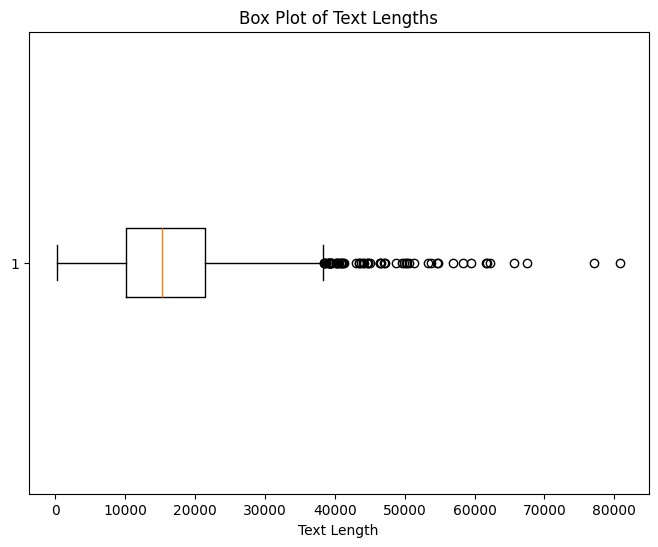

In [ ]:
import matplotlib.pyplot as plt

# Calculate the average length of texts in the 'clean_text' column
if 'clean_text' in final_v2.columns:
    final_v2['text_length'] = final_v2['clean_text'].astype(str).apply(len)
    average_length = final_v2['text_length'].mean()
    print(f"The average length of texts is: {average_length}")

    # Create a box plot of the text lengths
    plt.figure(figsize=(8, 6))
    plt.boxplot(final_v2['text_length'], vert=False)
    plt.xlabel("Text Length")
    plt.title("Box Plot of Text Lengths")
    plt.show()
else:
    print("Error: 'clean_text' column not found in the DataFrame.")


In [ ]:
import numpy as np

# Calculate quartiles and IQR
Q1 = final_v2['text_length'].quantile(0.25)
Q3 = final_v2['text_length'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = final_v2[(final_v2['text_length'] < lower_bound) | (final_v2['text_length'] > upper_bound)]
num_outliers = len(outliers)

print(f"Number of outliers in the box plot: {num_outliers}")


Number of outliers in the box plot: 59


In [ ]:
# Create the ECB DataFrame
ECB = final_v2[final_v2['country'] == 'Euro area']
FED = final_v2[final_v2['country'] == 'United States']

In [ ]:
# Count the number of unique dates in the ECB DataFrame
unique_dates_count_ECB = ECB['next_rate_date'].nunique()

print(f"Number of unique next_rate_date in ECB (the number of times ECB has changed rates within this period): {unique_dates_count_ECB}")


Number of unique next_rate_date in ECB (the number of times ECB has changed rates within this period): 38


In [ ]:
diff_count_ECB = 0
for i in range(1, len(ECB)):
  if ECB['current_rate'].iloc[i] != ECB['current_rate'].iloc[i-1]:
    diff_count_ECB += 1

print(f"Number of records with different current_rate than the previous one: {diff_count_ECB}")


Number of records with different current_rate than the previous one: 38


In [ ]:
# Count the number of unique dates in the ECB DataFrame
unique_dates_count_FED = FED['next_rate_date'].nunique()

print(f"Number of unique next_rate_date in FED (the number of times FED has changed rates within this period): {unique_dates_count_FED}")

Number of unique next_rate_date in FED (the number of times FED has changed rates within this period): 236


In [ ]:
diff_count_FED = 0
for i in range(1, len(FED)):
  if FED['current_rate'].iloc[i] != FED['current_rate'].iloc[i-1]:
    diff_count_FED += 1

print(f"Number of records with different current_rate than the previous one: {diff_count_FED}")

Number of records with different current_rate than the previous one: 236


In [ ]:
#final_v2.loc[0, 'title']
#final_v2.loc[0, 'description']
#print(final_v2.loc[0, 'text'])
#print(final_v2.loc[0, 'clean_text'])

In [ ]:
ECB.columns

Index(['date', 'title', 'description', 'text', 'author', 'country',
       'clean_text', 'current_rate', 'next_rate', 'next_rate_date',
       'rate_difference', 'previous_rate', 'rate_change_direction',
       'days_to_next_decision', 'quarter', 'year', 'role', 'text_length'],
      dtype='object')

In [ ]:
len(ECB[ECB['days_to_next_decision'].isna()])

5

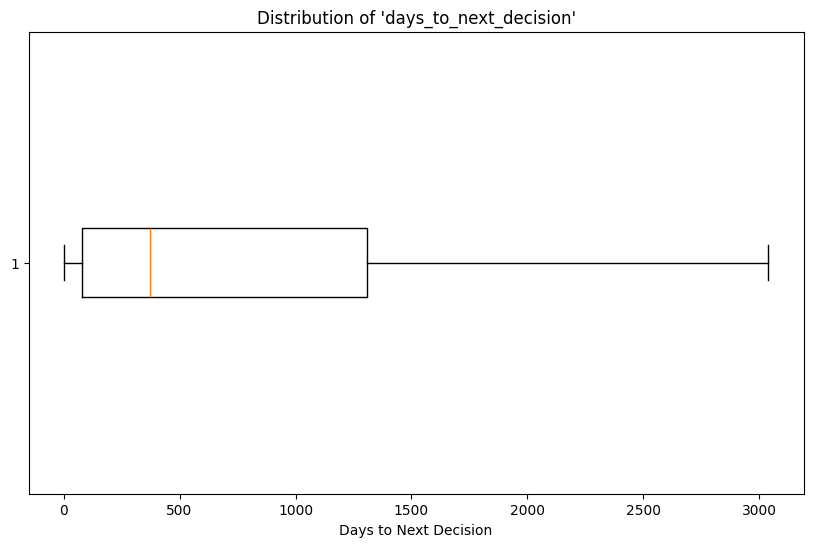

In [ ]:
import matplotlib.pyplot as plt

# Plotting the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(ECB['days_to_next_decision'].dropna(), vert=False)
plt.title("Distribution of 'days_to_next_decision'")
plt.xlabel("Days to Next Decision")
plt.show()

In [ ]:
len(FED[FED['days_to_next_decision'].isna()])

33

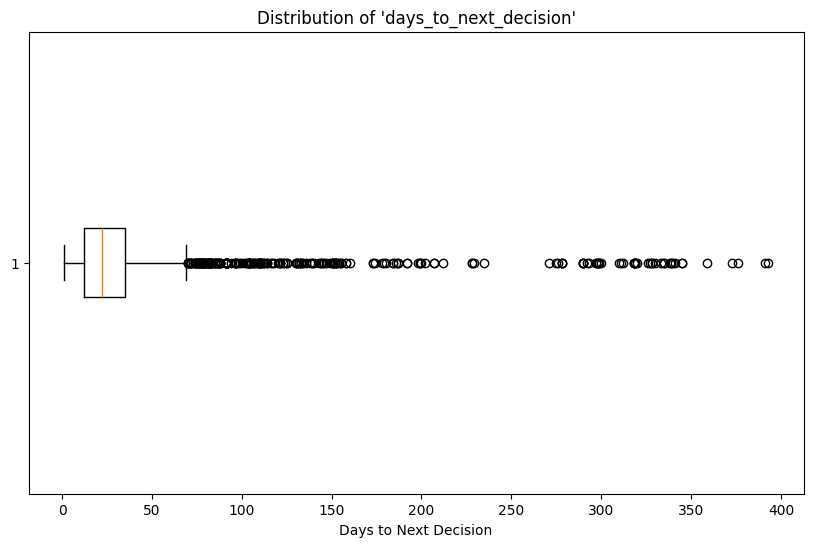

In [ ]:
import matplotlib.pyplot as plt

# Plotting the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(FED['days_to_next_decision'].dropna(), vert=False)
plt.title("Distribution of 'days_to_next_decision'")
plt.xlabel("Days to Next Decision")
plt.show()

In [ ]:
# Find rows with NaN values in 'next_rate'
nan_next_rate = final_v2[final_v2['next_rate'].isna()]

# Find rows with NaN values in 'next_rate_date'
nan_next_rate_date = final_v2[final_v2['next_rate_date'].isna()]

# Check if the indices of the NaN rows are the same
same_indices = nan_next_rate.index.equals(nan_next_rate_date.index)

if same_indices:
  print("Rows with NaN values in 'next_rate' and 'next_rate_date' are the same.")
else:
  print("Rows with NaN values in 'next_rate' and 'next_rate_date' are NOT the same.")

# Further analysis (optional):  Identify the rows that differ
if not same_indices:
    # Rows in next_rate but not next_rate_date
    diff1 = nan_next_rate.index.difference(nan_next_rate_date.index)
    print(f"\nIndices present in 'next_rate' NaN but not in 'next_rate_date' NaN: {diff1.tolist()}")

    # Rows in next_rate_date but not next_rate
    diff2 = nan_next_rate_date.index.difference(nan_next_rate.index)
    print(f"\nIndices present in 'next_rate_date' NaN but not in 'next_rate' NaN: {diff2.tolist()}")


Rows with NaN values in 'next_rate' and 'next_rate_date' are the same.


In [ ]:
print(final_v2['rate_change_direction'].unique())


['no change' 'increase' 'decrease']


In [ ]:
# Create test_raw DataFrame with rows where 'rate_difference' is NaN
test_raw = final_v2[final_v2['rate_difference'].isna()]

# Create train_raw DataFrame with rows where 'rate_difference' is NOT NaN
train_raw = final_v2[~final_v2['rate_difference'].isna()]


In [ ]:
import pandas as pd
# Fill NaN values in 'days_to_next_decision' with the difference between 'next_rate_date' and 'date'
final_v2['next_rate_date'] = pd.to_datetime(final_v2['next_rate_date'], errors='coerce')
final_v2['days_to_next_decision'] = final_v2.apply(lambda row: (row['next_rate_date'] - row['date']).days if pd.notna(row['next_rate_date']) and pd.notna(row['date']) else row['days_to_next_decision'], axis=1)


In [ ]:
# Create the 'label' column in train_raw
train_raw['label'] = train_raw['rate_difference'].apply(lambda x: 'rise' if x > 0 else 'cut')

<ipython-input-23-d15522d259e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_raw['label'] = train_raw['rate_difference'].apply(lambda x: 'rise' if x > 0 else 'cut')


In [ ]:
train_df1 = train_raw[['clean_text', 'label']]
train_df1.head()

,clean_text,label
0,"Remarks by Mr Roger W. Ferguson, Jr., a member...",rise
1,Introductory statement by the President of the...,cut
2,Speech by the President of the European Centra...,cut
3,"Remarks by Mr Roger W. Ferguson, Jr., a member...",rise
4,Introductory statement by the President of the...,cut


In [ ]:
# Count the number of rows with 'cut' and 'rise' labels
cut_count = len(train_df1[train_df1['label'] == 'cut'])
rise_count = len(train_df1[train_df1['label'] == 'rise'])

print(f"Number of rows with 'cut' label: {cut_count}")
print(f"Number of rows with 'rise' label: {rise_count}")


Number of rows with 'cut' label: 2329
Number of rows with 'rise' label: 2451


# BERT-LIKE MODEL

In [ ]:
# Install required libraries
!pip uninstall -y transformers peft bitsandbytes
!pip install -q transformers==4.30.0 accelerate datasets evaluate scikit-learn

Found existing installation: transformers 4.51.3
Uninstalling transformers-4.51.3:
  Successfully uninstalled transformers-4.51.3
Found existing installation: peft 0.15.2
Uninstalling peft-0.15.2:
  Successfully uninstalled peft-0.15.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/

## FIRST RUN WITH DEFAULT PARAMETERS AND MAX LENGHT 128 TO SPEED UP THE TRAINING

In [ ]:
import pandas as pd
import numpy as np
import torch
import random
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

# Set seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

# Load training data
#train_df1 = pd.read_csv('/content/drive/MyDrive/SEM 2/NLP/GP/train_df1.csv')
train_df1 = pd.read_csv('data/train_df1.csv')
label_mapping = {'cut': 0, 'rise': 1}
train_df1['label'] = train_df1['label'].map(label_mapping)

# Split data into train and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_df1['clean_text'].values,
    train_df1['label'].values,
    test_size=0.2,
    random_state=SEED
)

# Load the RoBERTa tokenizer
tokenizer = AutoTokenizer.from_pretrained('roberta-base')

# Tokenize the data
def tokenize(batch):
    return tokenizer(batch['text'], padding='max_length', truncation=True, max_length=128)

train_dataset = Dataset.from_dict({'text': train_texts, 'label': train_labels})
val_dataset = Dataset.from_dict({'text': val_texts, 'label': val_labels})

datasets = DatasetDict({'train': train_dataset, 'validation': val_dataset})
datasets = datasets.map(tokenize, batched=True)
datasets.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# Load the pre-trained RoBERTa model with adjusted classification head
model = AutoModelForSequenceClassification.from_pretrained(
    'roberta-base',
    num_labels=2,
    ignore_mismatched_sizes=True
)

# Set the problem type to single-label classification (important)
model.config.problem_type = "single_label_classification"

# Training arguments
training_args = TrainingArguments(
    output_dir='./results_roberta',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir='./logs_roberta',
    logging_steps=100,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model='macro_f1',
    greater_is_better=True,
    seed=SEED
)

# Compute metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    f1 = f1_score(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {'macro_f1': f1, 'accuracy': acc}

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=datasets['train'],
    eval_dataset=datasets['validation'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Map:   0%|          | 0/3824 [00:00<?, ? examples/s]

Map:   0%|          | 0/956 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias']
You should pr

Epoch,Training Loss,Validation Loss,Macro F1,Accuracy
1,0.499900,0.346854,0.828283,0.828452
2,0.330300,0.351207,0.847230,0.848326
3,0.238500,0.354042,0.888653,0.889121
4,0.180900,0.235856,0.919226,0.919456
5,0.183500,0.286509,0.919082,0.919456


TrainOutput(global_step=1195, training_loss=0.2996296072604766, metrics={'train_runtime': 494.4739, 'train_samples_per_second': 38.667, 'train_steps_per_second': 2.417, 'total_flos': 1257670844620800.0, 'train_loss': 0.2996296072604766, 'epoch': 5.0})

## REDUCING LEARNING RATE PROGRESSIVELY AND ADDING DROPOUT TO AVOID OVERFITTING

In [ ]:
import os
import pandas as pd
import numpy as np
import torch
import random
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, classification_report
from sklearn.utils.multiclass import unique_labels
from datasets import Dataset
from transformers import (
    RobertaTokenizerFast, RobertaForSequenceClassification, RobertaConfig,
    default_data_collator
)
from torch.utils.data import DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm

# Seed
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

#  Load Data
#df = pd.read_csv("/content/drive/MyDrive/SEM 2/NLP/GP/train_df1.csv")
df = pd.read_csv('data/train_df1.csv')
df['label'] = df['label'].map({'cut': 0, 'rise': 1})

# 14/15 train-validation split
kf = KFold(n_splits=15, shuffle=True, random_state=42)
train_index, val_index = next(kf.split(df))

X_train = df.iloc[train_index]['clean_text'].astype(str).tolist()
y_train = df.iloc[train_index]['label'].tolist()
X_val = df.iloc[val_index]['clean_text'].astype(str).tolist()
y_val = df.iloc[val_index]['label'].tolist()

# Tokenization
tokenizer = RobertaTokenizerFast.from_pretrained("roberta-base")
train_enc = tokenizer(X_train, truncation=True, padding=True, max_length=128)
val_enc = tokenizer(X_val, truncation=True, padding=True, max_length=128)

train_dataset = Dataset.from_dict({**train_enc, 'labels': y_train})
val_dataset = Dataset.from_dict({**val_enc, 'labels': y_val})

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=default_data_collator)
val_loader = DataLoader(val_dataset, batch_size=64, collate_fn=default_data_collator)

# Model Configuration
config = RobertaConfig.from_pretrained(
    "roberta-base",
    hidden_dropout_prob=0.2,
    attention_probs_dropout_prob=0.2,
    num_labels=2
)
model = RobertaForSequenceClassification.from_pretrained("roberta-base", config=config)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Optimizer + ReduceLROnPlateau on eval loss
optimizer = AdamW(model.parameters(), lr=1e-5, weight_decay=0.05)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=1, verbose=True)

# Save path
#save_path = "/content/drive/MyDrive/SEM 2/NLP/GP/roberta_2_class_best_checkpoint"
#os.makedirs(save_path, exist_ok=True)

# Training loop
num_epochs = 15
early_stopping_patience = 4
patience_counter = 0
best_eval_loss = float('inf')

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader, desc=f"🚀 Epoch {epoch+1}"):
        optimizer.zero_grad()
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)

    # Eval
    model.eval()
    total_eval_loss = 0
    preds, true = [], []

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            total_eval_loss += loss.item()
            preds.extend(torch.argmax(logits, axis=1).cpu().numpy())
            true.extend(labels.cpu().numpy())

    avg_eval_loss = total_eval_loss / len(val_loader)
    macro_f1 = f1_score(true, preds, average='macro')

    print(f" Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f} | Eval Loss = {avg_eval_loss:.4f} | Macro F1 = {macro_f1:.4f}")

    # Reduce LR on Eval Loss
    scheduler.step(avg_eval_loss)

    # Save best model by Eval Loss
    if avg_eval_loss < best_eval_loss:
        best_eval_loss = avg_eval_loss
        patience_counter = 0
        model.save_pretrained(save_path)
        tokenizer.save_pretrained(save_path)
        print(f" Saved best model (eval_loss = {avg_eval_loss:.4f}) to {save_path}")
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print(" Early stopping triggered.")
            break

# Final classification report (robusto)
present_labels = sorted(list(unique_labels(true, preds)))

print("\n Final Classification Report:")
print(classification_report(true, preds, labels=present_labels, target_names=['cut', 'rise']))
print(f"\n Final Macro F1: {macro_f1:.4f}")




/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should pr

📊 Epoch 1: Train Loss = 0.6794 | Eval Loss = 0.6333 | Macro F1 = 0.6326
💾 Saved best model (eval_loss = 0.6333) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_2_class_best_checkpoint


🚀 Epoch 2: 100%|██████████| 279/279 [01:39<00:00,  2.82it/s]


📊 Epoch 2: Train Loss = 0.4480 | Eval Loss = 0.3692 | Macro F1 = 0.8119
💾 Saved best model (eval_loss = 0.3692) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_2_class_best_checkpoint


🚀 Epoch 3: 100%|██████████| 279/279 [01:39<00:00,  2.81it/s]


📊 Epoch 3: Train Loss = 0.3286 | Eval Loss = 0.3846 | Macro F1 = 0.8025


🚀 Epoch 4: 100%|██████████| 279/279 [01:39<00:00,  2.81it/s]


📊 Epoch 4: Train Loss = 0.2982 | Eval Loss = 0.3481 | Macro F1 = 0.8557
💾 Saved best model (eval_loss = 0.3481) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_2_class_best_checkpoint


🚀 Epoch 5: 100%|██████████| 279/279 [01:39<00:00,  2.81it/s]


📊 Epoch 5: Train Loss = 0.2648 | Eval Loss = 0.2971 | Macro F1 = 0.8683
💾 Saved best model (eval_loss = 0.2971) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_2_class_best_checkpoint


🚀 Epoch 6: 100%|██████████| 279/279 [01:39<00:00,  2.81it/s]


📊 Epoch 6: Train Loss = 0.2158 | Eval Loss = 0.2416 | Macro F1 = 0.8997
💾 Saved best model (eval_loss = 0.2416) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_2_class_best_checkpoint


🚀 Epoch 7: 100%|██████████| 279/279 [01:39<00:00,  2.81it/s]


📊 Epoch 7: Train Loss = 0.1976 | Eval Loss = 0.1964 | Macro F1 = 0.9307
💾 Saved best model (eval_loss = 0.1964) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_2_class_best_checkpoint


🚀 Epoch 8: 100%|██████████| 279/279 [01:39<00:00,  2.81it/s]


📊 Epoch 8: Train Loss = 0.1724 | Eval Loss = 0.2078 | Macro F1 = 0.9152


🚀 Epoch 9: 100%|██████████| 279/279 [01:39<00:00,  2.82it/s]


📊 Epoch 9: Train Loss = 0.1452 | Eval Loss = 0.1275 | Macro F1 = 0.9404
💾 Saved best model (eval_loss = 0.1275) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_2_class_best_checkpoint


🚀 Epoch 10: 100%|██████████| 279/279 [01:39<00:00,  2.81it/s]


📊 Epoch 10: Train Loss = 0.1304 | Eval Loss = 0.1437 | Macro F1 = 0.9402


🚀 Epoch 11: 100%|██████████| 279/279 [01:39<00:00,  2.81it/s]


📊 Epoch 11: Train Loss = 0.1203 | Eval Loss = 0.1578 | Macro F1 = 0.9309


🚀 Epoch 12: 100%|██████████| 279/279 [01:39<00:00,  2.81it/s]


📊 Epoch 12: Train Loss = 0.0981 | Eval Loss = 0.1114 | Macro F1 = 0.9529
💾 Saved best model (eval_loss = 0.1114) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_2_class_best_checkpoint


🚀 Epoch 13: 100%|██████████| 279/279 [01:39<00:00,  2.81it/s]


📊 Epoch 13: Train Loss = 0.0826 | Eval Loss = 0.1071 | Macro F1 = 0.9434
💾 Saved best model (eval_loss = 0.1071) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_2_class_best_checkpoint


🚀 Epoch 14: 100%|██████████| 279/279 [01:39<00:00,  2.81it/s]


📊 Epoch 14: Train Loss = 0.0778 | Eval Loss = 0.1164 | Macro F1 = 0.9497


🚀 Epoch 15: 100%|██████████| 279/279 [01:38<00:00,  2.82it/s]


📊 Epoch 15: Train Loss = 0.0744 | Eval Loss = 0.1067 | Macro F1 = 0.9529
💾 Saved best model (eval_loss = 0.1067) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_2_class_best_checkpoint

📋 Final Classification Report:
              precision    recall  f1-score   support

         cut       0.94      0.97      0.95       164
        rise       0.97      0.94      0.95       155

    accuracy                           0.95       319
   macro avg       0.95      0.95      0.95       319
weighted avg       0.95      0.95      0.95       319


✅ Final Macro F1: 0.9529


# Training models on 14/15 of training with cut-off: the train-dev split is done by choosing speeches before a certain period for training and after that period for validation


In [ ]:
# Import
import os
import pandas as pd
import numpy as np
import torch
import random
from sklearn.metrics import f1_score, classification_report
from sklearn.utils.multiclass import unique_labels
from datasets import Dataset
from transformers import (
    RobertaTokenizerFast, RobertaForSequenceClassification, RobertaConfig,
    default_data_collator
)
from torch.utils.data import DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm

# Seed
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

# Load Data
#df = pd.read_csv("/content/drive/MyDrive/SEM 2/NLP/GP/03_MAT/train_df1.csv")
df['label'] = df['label'].map({'cut': 0, 'rise': 1})

# 14/15 train - 1/15 validation (time-aware split)
cutoff = int(len(df) * 14 / 15)
X_train = df.iloc[:cutoff]['clean_text'].astype(str).tolist()
y_train = df.iloc[:cutoff]['label'].tolist()
X_val = df.iloc[cutoff:]['clean_text'].astype(str).tolist()
y_val = df.iloc[cutoff:]['label'].tolist()

# Tokenization
tokenizer = RobertaTokenizerFast.from_pretrained("roberta-base")
train_enc = tokenizer(X_train, truncation=True, padding=True, max_length=128)
val_enc = tokenizer(X_val, truncation=True, padding=True, max_length=128)

train_dataset = Dataset.from_dict({**train_enc, 'labels': y_train})
val_dataset = Dataset.from_dict({**val_enc, 'labels': y_val})

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=default_data_collator)
val_loader = DataLoader(val_dataset, batch_size=64, collate_fn=default_data_collator)

# Model Config
config = RobertaConfig.from_pretrained(
    "roberta-base",
    hidden_dropout_prob=0.2,
    attention_probs_dropout_prob=0.2,
    num_labels=2
)
model = RobertaForSequenceClassification.from_pretrained("roberta-base", config=config)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Optimizer + ReduceLROnPlateau on eval loss
optimizer = AdamW(model.parameters(), lr=1e-6, weight_decay=0.05)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# Save path
#save_path = "/content/drive/MyDrive/SEM 2/NLP/GP/03_MAT/roberta_2_class_ts"
#os.makedirs(save_path, exist_ok=True)

# Training loop
num_epochs = 100
early_stopping_patience = 15
patience_counter = 0
best_eval_loss = float('inf')

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader, desc=f"🚀 Epoch {epoch+1}"):
        optimizer.zero_grad()
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)

    # Eval
    model.eval()
    total_eval_loss = 0
    preds, true = [], []

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            total_eval_loss += loss.item()
            preds.extend(torch.argmax(logits, axis=1).cpu().numpy())
            true.extend(labels.cpu().numpy())

    avg_eval_loss = total_eval_loss / len(val_loader)
    macro_f1 = f1_score(true, preds, average='macro')

    print(f" Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f} | Eval Loss = {avg_eval_loss:.4f} | Macro F1 = {macro_f1:.4f}")

    # Reduce LR on Eval Loss
    scheduler.step(avg_eval_loss)

    # Save best model by Eval Loss
    if avg_eval_loss < best_eval_loss:
        best_eval_loss = avg_eval_loss
        patience_counter = 0
        model.save_pretrained(save_path)
        tokenizer.save_pretrained(save_path)
        print(f"Saved best model (eval_loss = {avg_eval_loss:.4f}) to {save_path}")
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered.")
            break

# Final classification report (robusto)
present_labels = sorted(list(unique_labels(true, preds)))

print("\n Final Classification Report:")
print(classification_report(true, preds, labels=present_labels, target_names=['cut', 'rise']))
print(f"\n Final Macro F1: {macro_f1:.4f}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceCla

📊 Epoch 1: Train Loss = 0.6929 | Eval Loss = 0.7459 | Macro F1 = 0.1284
💾 Saved best model (eval_loss = 0.7459) to /content/drive/MyDrive/SEM 2/NLP/GP/03_MAT/roberta_2_class_ts


🚀 Epoch 2: 100%|██████████| 279/279 [00:52<00:00,  5.33it/s]


📊 Epoch 2: Train Loss = 0.6930 | Eval Loss = 0.7475 | Macro F1 = 0.1284


🚀 Epoch 3: 100%|██████████| 279/279 [00:52<00:00,  5.29it/s]


📊 Epoch 3: Train Loss = 0.6895 | Eval Loss = 0.7550 | Macro F1 = 0.1284


🚀 Epoch 4: 100%|██████████| 279/279 [00:52<00:00,  5.31it/s]


📊 Epoch 4: Train Loss = 0.6860 | Eval Loss = 0.7443 | Macro F1 = 0.1260
💾 Saved best model (eval_loss = 0.7443) to /content/drive/MyDrive/SEM 2/NLP/GP/03_MAT/roberta_2_class_ts


🚀 Epoch 5: 100%|██████████| 279/279 [00:52<00:00,  5.29it/s]


📊 Epoch 5: Train Loss = 0.6696 | Eval Loss = 0.9170 | Macro F1 = 0.1459


🚀 Epoch 6: 100%|██████████| 279/279 [00:52<00:00,  5.31it/s]


📊 Epoch 6: Train Loss = 0.5572 | Eval Loss = 1.5851 | Macro F1 = 0.1300


🚀 Epoch 7: 100%|██████████| 279/279 [00:52<00:00,  5.30it/s]


📊 Epoch 7: Train Loss = 0.5058 | Eval Loss = 2.0252 | Macro F1 = 0.1300


🚀 Epoch 8: 100%|██████████| 279/279 [00:52<00:00,  5.31it/s]


📊 Epoch 8: Train Loss = 0.4597 | Eval Loss = 2.1633 | Macro F1 = 0.1324


🚀 Epoch 9: 100%|██████████| 279/279 [00:52<00:00,  5.31it/s]


📊 Epoch 9: Train Loss = 0.4328 | Eval Loss = 2.0414 | Macro F1 = 0.1324


🚀 Epoch 10: 100%|██████████| 279/279 [00:52<00:00,  5.31it/s]


📊 Epoch 10: Train Loss = 0.4142 | Eval Loss = 2.0111 | Macro F1 = 0.1364


🚀 Epoch 11: 100%|██████████| 279/279 [00:52<00:00,  5.30it/s]


📊 Epoch 11: Train Loss = 0.4029 | Eval Loss = 2.1081 | Macro F1 = 0.1364


🚀 Epoch 12: 100%|██████████| 279/279 [00:52<00:00,  5.31it/s]


📊 Epoch 12: Train Loss = 0.3904 | Eval Loss = 2.1623 | Macro F1 = 0.1364


🚀 Epoch 13: 100%|██████████| 279/279 [00:52<00:00,  5.30it/s]


📊 Epoch 13: Train Loss = 0.3780 | Eval Loss = 2.2068 | Macro F1 = 0.1364


🚀 Epoch 14: 100%|██████████| 279/279 [00:52<00:00,  5.31it/s]


📊 Epoch 14: Train Loss = 0.3774 | Eval Loss = 2.1948 | Macro F1 = 0.1364


🚀 Epoch 15: 100%|██████████| 279/279 [00:52<00:00,  5.31it/s]


📊 Epoch 15: Train Loss = 0.3689 | Eval Loss = 2.2755 | Macro F1 = 0.1324


🚀 Epoch 16: 100%|██████████| 279/279 [00:52<00:00,  5.31it/s]


📊 Epoch 16: Train Loss = 0.3627 | Eval Loss = 2.2165 | Macro F1 = 0.1364


🚀 Epoch 17: 100%|██████████| 279/279 [00:52<00:00,  5.31it/s]


📊 Epoch 17: Train Loss = 0.3666 | Eval Loss = 2.2623 | Macro F1 = 0.1364


🚀 Epoch 18: 100%|██████████| 279/279 [00:52<00:00,  5.30it/s]


📊 Epoch 18: Train Loss = 0.3581 | Eval Loss = 2.2153 | Macro F1 = 0.1364


🚀 Epoch 19: 100%|██████████| 279/279 [00:52<00:00,  5.30it/s]


📊 Epoch 19: Train Loss = 0.3601 | Eval Loss = 2.3056 | Macro F1 = 0.1364
🛑 Early stopping triggered.

📋 Final Classification Report:
              precision    recall  f1-score   support

         cut       1.00      0.01      0.01       272
        rise       0.15      1.00      0.26        47

    accuracy                           0.15       319
   macro avg       0.57      0.50      0.14       319
weighted avg       0.87      0.15      0.05       319


✅ Final Macro F1: 0.1364


In [ ]:
# Import
import os
import pandas as pd
import numpy as np
import torch
import random
from collections import Counter
from sklearn.metrics import f1_score, classification_report
from sklearn.utils.multiclass import unique_labels
from datasets import Dataset
from transformers import (
    RobertaTokenizerFast, RobertaForSequenceClassification, RobertaConfig,
    default_data_collator
)
from torch.utils.data import DataLoader
from torch.nn import CrossEntropyLoss
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm

# Seed
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

# Load Data
#df = pd.read_csv("/content/drive/MyDrive/SEM 2/NLP/GP/03_MAT/train_df1.csv")
df['label'] = df['label'].map({'cut': 0, 'rise': 1})

# Time-aware split (14/15 train, 1/15 val)
cutoff = int(len(df) * 14 / 15)
X_train = df.iloc[:cutoff]['clean_text'].astype(str).tolist()
y_train = df.iloc[:cutoff]['label'].tolist()
X_val = df.iloc[cutoff:]['clean_text'].astype(str).tolist()
y_val = df.iloc[cutoff:]['label'].tolist()

# Compute class weights
class_counts = np.bincount(y_train)
total = sum(class_counts)
weights = torch.tensor([total / c for c in class_counts], dtype=torch.float)
print(" Class Weights:", weights)

# Tokenization
tokenizer = RobertaTokenizerFast.from_pretrained("roberta-base")
train_enc = tokenizer(X_train, truncation=True, padding=True, max_length=128)
val_enc = tokenizer(X_val, truncation=True, padding=True, max_length=128)

train_dataset = Dataset.from_dict({**train_enc, 'labels': y_train})
val_dataset = Dataset.from_dict({**val_enc, 'labels': y_val})

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=default_data_collator)
val_loader = DataLoader(val_dataset, batch_size=64, collate_fn=default_data_collator)

# Model
config = RobertaConfig.from_pretrained(
    "roberta-base",
    hidden_dropout_prob=0.2,
    attention_probs_dropout_prob=0.2,
    num_labels=2
)
model = RobertaForSequenceClassification.from_pretrained("roberta-base", config=config)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Optimizer and scheduler (on F1 now)
optimizer = AdamW(model.parameters(), lr=1e-5, weight_decay=0.05)
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2, verbose=True)

# Save path
#save_path = "/content/drive/MyDrive/SEM 2/NLP/GP/03_MAT/roberta_2_class_best_macro_f1"
#os.makedirs(save_path, exist_ok=True)

# Training loop
num_epochs = 100
early_stopping_patience = 15
patience_counter = 0
best_macro_f1 = 0.0
weights = weights.to(device)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader, desc=f" Epoch {epoch+1}"):
        optimizer.zero_grad()
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        loss_fct = CrossEntropyLoss(weight=weights)
        loss = loss_fct(logits, labels)

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)

    # Evaluation
    model.eval()
    total_eval_loss = 0
    preds, true = [], []

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = CrossEntropyLoss(weight=weights)(logits, labels)

            total_eval_loss += loss.item()
            preds.extend(torch.argmax(logits, axis=1).cpu().numpy())
            true.extend(labels.cpu().numpy())

    avg_eval_loss = total_eval_loss / len(val_loader)
    macro_f1 = f1_score(true, preds, average='macro')

    print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f} | Eval Loss = {avg_eval_loss:.4f} | Macro F1 = {macro_f1:.4f}")

    # Reduce LR on Macro F1 (mode='max')
    scheduler.step(macro_f1)

    # Save best model by Macro F1
    if macro_f1 > best_macro_f1:
        best_macro_f1 = macro_f1
        patience_counter = 0
        model.save_pretrained(save_path)
        tokenizer.save_pretrained(save_path)
        print(f" Saved best model (macro_f1 = {macro_f1:.4f}) to {save_path}")
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print(" Early stopping triggered.")
            break

# Final report
present_labels = sorted(list(unique_labels(true, preds)))
target_names = ['cut', 'rise']

print("\n Final Classification Report:")
print(classification_report(true, preds, labels=present_labels, target_names=target_names, digits=4))

report_dict = classification_report(true, preds, labels=present_labels, target_names=target_names, output_dict=True)
for cls in target_names:
    print(f"\n {cls.upper()} Metrics:")
    print(f" - Precision: {report_dict[cls]['precision']:.4f}")
    print(f" - Recall:    {report_dict[cls]['recall']:.4f}")
    print(f" - F1-score:  {report_dict[cls]['f1-score']:.4f}")
    print(f" - Support:   {report_dict[cls]['support']}")

macro_metrics = report_dict['macro avg']
print(f"\n Final Macro F1: {macro_metrics['f1-score']:.4f}")
print(f"   - Macro Precision: {macro_metrics['precision']:.4f}")
print(f"   - Macro Recall:    {macro_metrics['recall']:.4f}")


⚖️ Class Weights: tensor([2.1687, 1.8557])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceCla

📊 Epoch 1: Train Loss = 0.6564 | Eval Loss = 1.2528 | Macro F1 = 0.1355
💾 Saved best model (macro_f1 = 0.1355) to /content/drive/MyDrive/SEM 2/NLP/GP/03_MAT/roberta_2_class_best_macro_f1


🚀 Epoch 2: 100%|██████████| 279/279 [00:52<00:00,  5.34it/s]


📊 Epoch 2: Train Loss = 0.4494 | Eval Loss = 1.9179 | Macro F1 = 0.1782
💾 Saved best model (macro_f1 = 0.1782) to /content/drive/MyDrive/SEM 2/NLP/GP/03_MAT/roberta_2_class_best_macro_f1


🚀 Epoch 3: 100%|██████████| 279/279 [00:52<00:00,  5.29it/s]


📊 Epoch 3: Train Loss = 0.3410 | Eval Loss = 2.4660 | Macro F1 = 0.2405
💾 Saved best model (macro_f1 = 0.2405) to /content/drive/MyDrive/SEM 2/NLP/GP/03_MAT/roberta_2_class_best_macro_f1


🚀 Epoch 4: 100%|██████████| 279/279 [00:52<00:00,  5.31it/s]


📊 Epoch 4: Train Loss = 0.3221 | Eval Loss = 2.7904 | Macro F1 = 0.3210
💾 Saved best model (macro_f1 = 0.3210) to /content/drive/MyDrive/SEM 2/NLP/GP/03_MAT/roberta_2_class_best_macro_f1


🚀 Epoch 5: 100%|██████████| 279/279 [00:52<00:00,  5.30it/s]


📊 Epoch 5: Train Loss = 0.2935 | Eval Loss = 3.8814 | Macro F1 = 0.1521


🚀 Epoch 6: 100%|██████████| 279/279 [00:52<00:00,  5.30it/s]


📊 Epoch 6: Train Loss = 0.2802 | Eval Loss = 4.8926 | Macro F1 = 0.1404


🚀 Epoch 7: 100%|██████████| 279/279 [00:52<00:00,  5.30it/s]


📊 Epoch 7: Train Loss = 0.2639 | Eval Loss = 4.8064 | Macro F1 = 0.1482


🚀 Epoch 8: 100%|██████████| 279/279 [00:52<00:00,  5.30it/s]


📊 Epoch 8: Train Loss = 0.2340 | Eval Loss = 5.1484 | Macro F1 = 0.1404


🚀 Epoch 9: 100%|██████████| 279/279 [00:52<00:00,  5.30it/s]


📊 Epoch 9: Train Loss = 0.2166 | Eval Loss = 5.0534 | Macro F1 = 0.1599


🚀 Epoch 10: 100%|██████████| 279/279 [00:52<00:00,  5.30it/s]


📊 Epoch 10: Train Loss = 0.2132 | Eval Loss = 5.3483 | Macro F1 = 0.1404


🚀 Epoch 11: 100%|██████████| 279/279 [00:52<00:00,  5.30it/s]


📊 Epoch 11: Train Loss = 0.1877 | Eval Loss = 5.9232 | Macro F1 = 0.1364


🚀 Epoch 12: 100%|██████████| 279/279 [00:52<00:00,  5.30it/s]


📊 Epoch 12: Train Loss = 0.1754 | Eval Loss = 5.4945 | Macro F1 = 0.1637


🚀 Epoch 13: 100%|██████████| 279/279 [00:52<00:00,  5.30it/s]


📊 Epoch 13: Train Loss = 0.1659 | Eval Loss = 5.5932 | Macro F1 = 0.1560


🚀 Epoch 14: 100%|██████████| 279/279 [00:52<00:00,  5.30it/s]


📊 Epoch 14: Train Loss = 0.1607 | Eval Loss = 6.2613 | Macro F1 = 0.1404


🚀 Epoch 15: 100%|██████████| 279/279 [00:52<00:00,  5.30it/s]


📊 Epoch 15: Train Loss = 0.1435 | Eval Loss = 5.8685 | Macro F1 = 0.1599


🚀 Epoch 16: 100%|██████████| 279/279 [00:52<00:00,  5.30it/s]


📊 Epoch 16: Train Loss = 0.1365 | Eval Loss = 6.0531 | Macro F1 = 0.1637


🚀 Epoch 17: 100%|██████████| 279/279 [00:52<00:00,  5.29it/s]


📊 Epoch 17: Train Loss = 0.1447 | Eval Loss = 6.3126 | Macro F1 = 0.1599


🚀 Epoch 18: 100%|██████████| 279/279 [00:52<00:00,  5.30it/s]


📊 Epoch 18: Train Loss = 0.1367 | Eval Loss = 6.2903 | Macro F1 = 0.1599


🚀 Epoch 19: 100%|██████████| 279/279 [00:52<00:00,  5.30it/s]


📊 Epoch 19: Train Loss = 0.1315 | Eval Loss = 6.4295 | Macro F1 = 0.1599
🛑 Early stopping triggered.

📋 Final Classification Report:
              precision    recall  f1-score   support

         cut     1.0000    0.0294    0.0571       272
        rise     0.1511    1.0000    0.2626        47

    accuracy                         0.1724       319
   macro avg     0.5756    0.5147    0.1599       319
weighted avg     0.8749    0.1724    0.0874       319


📌 CUT Metrics:
 - Precision: 1.0000
 - Recall:    0.0294
 - F1-score:  0.0571
 - Support:   272.0

📌 RISE Metrics:
 - Precision: 0.1511
 - Recall:    1.0000
 - F1-score:  0.2626
 - Support:   47.0

✅ Final Macro F1: 0.1599
   - Macro Precision: 0.5756
   - Macro Recall:    0.5147


# FIVE WAYS CLASSIFICATION TRAINING: WE START WITH THE SAME PARAMETERS USED FOR 2 WAYS CLASSIFICATION AND SEE WHAT WE ARE GETTING


In [ ]:
import os
import pandas as pd
import numpy as np
import torch
import random
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, classification_report
from sklearn.utils.multiclass import unique_labels
from datasets import Dataset
from transformers import (
    RobertaTokenizerFast, RobertaForSequenceClassification, RobertaConfig,
    default_data_collator
)
from torch.utils.data import DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm

# Seed
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

# Load Data
#df = pd.read_csv("/content/drive/MyDrive/SEM 2/NLP/GP/5_way_class.csv")
df = pd.read_csv('data/5_way_class.csv')

# Label encoding
label_mapping = {
    'Immediate Cut': 0,
    'Immediate Rise': 1,
    'Upcoming Cut': 2,
    'Upcoming Rise': 3,
    'Stable': 4
}
df['label'] = df['five_way_label'].map(label_mapping)

# 14/15 train-validation split
kf = KFold(n_splits=15, shuffle=True, random_state=42)
train_index, val_index = next(kf.split(df))

X_train = df.iloc[train_index]['clean_text'].astype(str).tolist()
y_train = df.iloc[train_index]['label'].tolist()
X_val = df.iloc[val_index]['clean_text'].astype(str).tolist()
y_val = df.iloc[val_index]['label'].tolist()

# Tokenization
tokenizer = RobertaTokenizerFast.from_pretrained("roberta-base")
train_enc = tokenizer(X_train, truncation=True, padding=True, max_length=128)
val_enc = tokenizer(X_val, truncation=True, padding=True, max_length=128)

train_dataset = Dataset.from_dict({**train_enc, 'labels': y_train})
val_dataset = Dataset.from_dict({**val_enc, 'labels': y_val})

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=default_data_collator)
val_loader = DataLoader(val_dataset, batch_size=64, collate_fn=default_data_collator)

# Model Config
config = RobertaConfig.from_pretrained(
    "roberta-base",
    hidden_dropout_prob=0.2,
    attention_probs_dropout_prob=0.2,
    num_labels=5
)
model = RobertaForSequenceClassification.from_pretrained("roberta-base", config=config)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Optimizer + ReduceLROnPlateau on eval loss
optimizer = AdamW(model.parameters(), lr=1e-5, weight_decay=0.05)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

# Save path
#save_path = "/content/drive/MyDrive/SEM 2/NLP/GP/roberta_5_class_best_checkpoint"
#os.makedirs(save_path, exist_ok=True)

# Training loop
num_epochs = 100
early_stopping_patience = 7
patience_counter = 0
best_eval_loss = float('inf')

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader, desc=f" Epoch {epoch+1}"):
        optimizer.zero_grad()
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)

    # Eval
    model.eval()
    total_eval_loss = 0
    preds, true = [], []

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            total_eval_loss += loss.item()
            preds.extend(torch.argmax(logits, axis=1).cpu().numpy())
            true.extend(labels.cpu().numpy())

    avg_eval_loss = total_eval_loss / len(val_loader)
    macro_f1 = f1_score(true, preds, average='macro')

    print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f} | Eval Loss = {avg_eval_loss:.4f} | Macro F1 = {macro_f1:.4f}")

    # Reduce LR on Eval Loss
    scheduler.step(avg_eval_loss)

    # Save best model by Eval Loss
    if avg_eval_loss < best_eval_loss:
        best_eval_loss = avg_eval_loss
        patience_counter = 0
        model.save_pretrained(save_path)
        tokenizer.save_pretrained(save_path)
        print(f"Saved best model (eval_loss = {avg_eval_loss:.4f}) to {save_path}")
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered.")
            break

# Final classification report (robusto)
present_labels = sorted(list(unique_labels(true, preds)))

print("\n Final Classification Report:")
print(classification_report(true, preds, labels=present_labels, target_names=label_mapping.keys()))
print(f"\n Final Macro F1: {macro_f1:.4f}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should pr

📊 Epoch 1: Train Loss = 1.3080 | Eval Loss = 1.2801 | Macro F1 = 0.2653
💾 Saved best model (eval_loss = 1.2801) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_5_class_best_checkpoint


🚀 Epoch 2: 100%|██████████| 279/279 [01:41<00:00,  2.74it/s]


📊 Epoch 2: Train Loss = 1.2132 | Eval Loss = 1.2147 | Macro F1 = 0.2882
💾 Saved best model (eval_loss = 1.2147) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_5_class_best_checkpoint


🚀 Epoch 3: 100%|██████████| 279/279 [01:42<00:00,  2.73it/s]


📊 Epoch 3: Train Loss = 1.1501 | Eval Loss = 1.0501 | Macro F1 = 0.4078
💾 Saved best model (eval_loss = 1.0501) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_5_class_best_checkpoint


🚀 Epoch 4: 100%|██████████| 279/279 [01:42<00:00,  2.73it/s]


📊 Epoch 4: Train Loss = 0.9490 | Eval Loss = 0.9398 | Macro F1 = 0.5379
💾 Saved best model (eval_loss = 0.9398) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_5_class_best_checkpoint


🚀 Epoch 5: 100%|██████████| 279/279 [01:42<00:00,  2.73it/s]


📊 Epoch 5: Train Loss = 0.8466 | Eval Loss = 0.8596 | Macro F1 = 0.5896
💾 Saved best model (eval_loss = 0.8596) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_5_class_best_checkpoint


🚀 Epoch 6: 100%|██████████| 279/279 [01:42<00:00,  2.73it/s]


📊 Epoch 6: Train Loss = 0.7991 | Eval Loss = 0.8101 | Macro F1 = 0.5448
💾 Saved best model (eval_loss = 0.8101) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_5_class_best_checkpoint


🚀 Epoch 7: 100%|██████████| 279/279 [01:42<00:00,  2.72it/s]


📊 Epoch 7: Train Loss = 0.7550 | Eval Loss = 0.7522 | Macro F1 = 0.6155
💾 Saved best model (eval_loss = 0.7522) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_5_class_best_checkpoint


🚀 Epoch 8: 100%|██████████| 279/279 [01:42<00:00,  2.72it/s]


📊 Epoch 8: Train Loss = 0.7307 | Eval Loss = 0.7426 | Macro F1 = 0.6243
💾 Saved best model (eval_loss = 0.7426) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_5_class_best_checkpoint


🚀 Epoch 9: 100%|██████████| 279/279 [01:42<00:00,  2.72it/s]


📊 Epoch 9: Train Loss = 0.6810 | Eval Loss = 0.6577 | Macro F1 = 0.6893
💾 Saved best model (eval_loss = 0.6577) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_5_class_best_checkpoint


🚀 Epoch 10: 100%|██████████| 279/279 [01:42<00:00,  2.72it/s]


📊 Epoch 10: Train Loss = 0.6479 | Eval Loss = 0.6383 | Macro F1 = 0.6977
💾 Saved best model (eval_loss = 0.6383) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_5_class_best_checkpoint


🚀 Epoch 11: 100%|██████████| 279/279 [01:42<00:00,  2.72it/s]


📊 Epoch 11: Train Loss = 0.6040 | Eval Loss = 0.6727 | Macro F1 = 0.6800


🚀 Epoch 12: 100%|██████████| 279/279 [01:42<00:00,  2.72it/s]


📊 Epoch 12: Train Loss = 0.5544 | Eval Loss = 0.5655 | Macro F1 = 0.7587
💾 Saved best model (eval_loss = 0.5655) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_5_class_best_checkpoint


🚀 Epoch 13: 100%|██████████| 279/279 [01:43<00:00,  2.71it/s]


📊 Epoch 13: Train Loss = 0.5052 | Eval Loss = 0.6426 | Macro F1 = 0.7285


🚀 Epoch 14: 100%|██████████| 279/279 [01:42<00:00,  2.72it/s]


📊 Epoch 14: Train Loss = 0.4602 | Eval Loss = 0.4264 | Macro F1 = 0.8269
💾 Saved best model (eval_loss = 0.4264) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_5_class_best_checkpoint


🚀 Epoch 15: 100%|██████████| 279/279 [01:42<00:00,  2.72it/s]


📊 Epoch 15: Train Loss = 0.4150 | Eval Loss = 0.5141 | Macro F1 = 0.7583


🚀 Epoch 16: 100%|██████████| 279/279 [01:42<00:00,  2.73it/s]


📊 Epoch 16: Train Loss = 0.3859 | Eval Loss = 0.4559 | Macro F1 = 0.8144


🚀 Epoch 17: 100%|██████████| 279/279 [01:42<00:00,  2.72it/s]


📊 Epoch 17: Train Loss = 0.3446 | Eval Loss = 0.3853 | Macro F1 = 0.8666
💾 Saved best model (eval_loss = 0.3853) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_5_class_best_checkpoint


🚀 Epoch 18: 100%|██████████| 279/279 [01:42<00:00,  2.73it/s]


📊 Epoch 18: Train Loss = 0.3028 | Eval Loss = 0.4359 | Macro F1 = 0.8196


🚀 Epoch 19: 100%|██████████| 279/279 [01:42<00:00,  2.73it/s]


📊 Epoch 19: Train Loss = 0.2868 | Eval Loss = 0.4355 | Macro F1 = 0.8237


🚀 Epoch 20: 100%|██████████| 279/279 [01:42<00:00,  2.72it/s]


📊 Epoch 20: Train Loss = 0.2710 | Eval Loss = 0.4368 | Macro F1 = 0.8326


🚀 Epoch 21: 100%|██████████| 279/279 [01:42<00:00,  2.73it/s]


📊 Epoch 21: Train Loss = 0.2093 | Eval Loss = 0.3609 | Macro F1 = 0.8463
💾 Saved best model (eval_loss = 0.3609) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_5_class_best_checkpoint


🚀 Epoch 22: 100%|██████████| 279/279 [01:42<00:00,  2.72it/s]


📊 Epoch 22: Train Loss = 0.1934 | Eval Loss = 0.3617 | Macro F1 = 0.8494


🚀 Epoch 23: 100%|██████████| 279/279 [01:42<00:00,  2.73it/s]


📊 Epoch 23: Train Loss = 0.1735 | Eval Loss = 0.3563 | Macro F1 = 0.8553
💾 Saved best model (eval_loss = 0.3563) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_5_class_best_checkpoint


🚀 Epoch 24: 100%|██████████| 279/279 [01:42<00:00,  2.73it/s]


📊 Epoch 24: Train Loss = 0.1686 | Eval Loss = 0.3867 | Macro F1 = 0.8492


🚀 Epoch 25: 100%|██████████| 279/279 [01:42<00:00,  2.73it/s]


📊 Epoch 25: Train Loss = 0.1481 | Eval Loss = 0.3236 | Macro F1 = 0.8798
💾 Saved best model (eval_loss = 0.3236) to /content/drive/MyDrive/SEM 2/NLP/GP/roberta_5_class_best_checkpoint


🚀 Epoch 26: 100%|██████████| 279/279 [01:42<00:00,  2.73it/s]


📊 Epoch 26: Train Loss = 0.1346 | Eval Loss = 0.3669 | Macro F1 = 0.8526


🚀 Epoch 27: 100%|██████████| 279/279 [01:42<00:00,  2.72it/s]


📊 Epoch 27: Train Loss = 0.1253 | Eval Loss = 0.3750 | Macro F1 = 0.8658


🚀 Epoch 28: 100%|██████████| 279/279 [01:42<00:00,  2.72it/s]


📊 Epoch 28: Train Loss = 0.1256 | Eval Loss = 0.4255 | Macro F1 = 0.8540


🚀 Epoch 29: 100%|██████████| 279/279 [01:42<00:00,  2.73it/s]


📊 Epoch 29: Train Loss = 0.0987 | Eval Loss = 0.3797 | Macro F1 = 0.8641


🚀 Epoch 30: 100%|██████████| 279/279 [01:42<00:00,  2.73it/s]


📊 Epoch 30: Train Loss = 0.0999 | Eval Loss = 0.4031 | Macro F1 = 0.8549


🚀 Epoch 31: 100%|██████████| 279/279 [01:42<00:00,  2.73it/s]


📊 Epoch 31: Train Loss = 0.0942 | Eval Loss = 0.4076 | Macro F1 = 0.8682


🚀 Epoch 32: 100%|██████████| 279/279 [01:42<00:00,  2.73it/s]


📊 Epoch 32: Train Loss = 0.0791 | Eval Loss = 0.3910 | Macro F1 = 0.8668
🛑 Early stopping triggered.

📋 Final Classification Report:
                precision    recall  f1-score   support

 Immediate Cut       0.81      0.79      0.80        61
Immediate Rise       0.93      0.92      0.93        77
  Upcoming Cut       0.76      0.81      0.79        48
 Upcoming Rise       0.90      0.84      0.87        31
        Stable       0.94      0.96      0.95       102

      accuracy                           0.88       319
     macro avg       0.87      0.86      0.87       319
  weighted avg       0.88      0.88      0.88       319


✅ Final Macro F1: 0.8668


# Just as before: training with Cut-off

In [ ]:
import os
import pandas as pd
import numpy as np
import torch
import random
from sklearn.metrics import f1_score, classification_report
from sklearn.utils.multiclass import unique_labels
from datasets import Dataset
from transformers import (
    RobertaTokenizerFast, RobertaForSequenceClassification, RobertaConfig,
    default_data_collator
)
from torch.utils.data import DataLoader
from torch.nn import CrossEntropyLoss
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm

# Seed
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

# Load Data
#df = pd.read_csv("/content/drive/MyDrive/SEM 2/NLP/GP/03_MAT/5_way_class.csv")

# Label encoding
label_mapping = {
    'Immediate Cut': 0,
    'Immediate Rise': 1,
    'Upcoming Cut': 2,
    'Upcoming Rise': 3,
    'Stable': 4
}
df['label'] = df['five_way_label'].map(label_mapping)

# Time-aware 14/15 train - 1/15 validation split
cutoff = int(len(df) * 14 / 15)
X_train = df.iloc[:cutoff]['clean_text'].astype(str).tolist()
y_train = df.iloc[:cutoff]['label'].tolist()
X_val = df.iloc[cutoff:]['clean_text'].astype(str).tolist()
y_val = df.iloc[cutoff:]['label'].tolist()

# Compute class weights
class_counts = np.bincount(y_train)
total = sum(class_counts)
weights = torch.tensor([total / c for c in class_counts], dtype=torch.float)
print(" Class Weights:", weights)

# Tokenization
tokenizer = RobertaTokenizerFast.from_pretrained("roberta-base")
train_enc = tokenizer(X_train, truncation=True, padding=True, max_length=128)
val_enc = tokenizer(X_val, truncation=True, padding=True, max_length=128)

train_dataset = Dataset.from_dict({**train_enc, 'labels': y_train})
val_dataset = Dataset.from_dict({**val_enc, 'labels': y_val})

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=default_data_collator)
val_loader = DataLoader(val_dataset, batch_size=64, collate_fn=default_data_collator)

# Model
config = RobertaConfig.from_pretrained(
    "roberta-base",
    hidden_dropout_prob=0.2,
    attention_probs_dropout_prob=0.2,
    num_labels=5
)
model = RobertaForSequenceClassification.from_pretrained("roberta-base", config=config)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
weights = weights.to(device)

# Optimizer + Scheduler (Macro F1)
optimizer = AdamW(model.parameters(), lr=1e-5, weight_decay=0.05)
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2, verbose=True)

# Save path
#save_path = "/content/drive/MyDrive/SEM 2/NLP/GP/03_MAT/roberta_5_class_best_macro_f1_weighted"
#os.makedirs(save_path, exist_ok=True)

# Training loop
num_epochs = 100
early_stopping_patience = 7
patience_counter = 0
best_macro_f1 = 0.0

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader, desc=f" Epoch {epoch+1}"):
        optimizer.zero_grad()
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        loss_fct = CrossEntropyLoss(weight=weights)
        loss = loss_fct(logits, labels)

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)

    # Evaluation
    model.eval()
    total_eval_loss = 0
    preds, true = [], []

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            loss = CrossEntropyLoss(weight=weights)(logits, labels)
            total_eval_loss += loss.item()
            preds.extend(torch.argmax(logits, axis=1).cpu().numpy())
            true.extend(labels.cpu().numpy())

    avg_eval_loss = total_eval_loss / len(val_loader)
    macro_f1 = f1_score(true, preds, average='macro')

    print(f" Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f} | Eval Loss = {avg_eval_loss:.4f} | Macro F1 = {macro_f1:.4f}")

    # Reduce LR on Macro F1
    scheduler.step(macro_f1)

    # Save best model by Macro F1
    if macro_f1 > best_macro_f1:
        best_macro_f1 = macro_f1
        patience_counter = 0
        model.save_pretrained(save_path)
        tokenizer.save_pretrained(save_path)
        print(f" Saved best model (macro_f1 = {macro_f1:.4f}) to {save_path}")
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered.")
            break

# Final classification report
present_labels = sorted(list(unique_labels(true, preds)))
target_names = list(label_mapping.keys())

print("\nFinal Classification Report:")
print(classification_report(true, preds, labels=present_labels, target_names=target_names, digits=4))

report_dict = classification_report(true, preds, labels=present_labels, target_names=target_names, output_dict=True)
for cls in target_names:
    print(f"\n {cls.upper()} Metrics:")
    print(f" - Precision: {report_dict[cls]['precision']:.4f}")
    print(f" - Recall:    {report_dict[cls]['recall']:.4f}")
    print(f" - F1-score:  {report_dict[cls]['f1-score']:.4f}")
    print(f" - Support:   {report_dict[cls]['support']}")

macro_metrics = report_dict['macro avg']
print(f"\n Final Macro F1: {macro_metrics['f1-score']:.4f}")
print(f"   - Macro Precision: {macro_metrics['precision']:.4f}")
print(f"   - Macro Recall:    {macro_metrics['recall']:.4f}")


⚖️ Class Weights: tensor([ 5.6113,  4.3437,  6.9703, 10.0247,  2.8707])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceCla

📊 Epoch 1: Train Loss = 1.4307 | Eval Loss = 2.2318 | Macro F1 = 0.1254
💾 Saved best model (macro_f1 = 0.1254) to /content/drive/MyDrive/SEM 2/NLP/GP/03_MAT/roberta_5_class_best_macro_f1_weighted


🚀 Epoch 2: 100%|██████████| 279/279 [00:52<00:00,  5.33it/s]


📊 Epoch 2: Train Loss = 1.3069 | Eval Loss = 2.3987 | Macro F1 = 0.0973


🚀 Epoch 3: 100%|██████████| 279/279 [00:52<00:00,  5.31it/s]


📊 Epoch 3: Train Loss = 1.2166 | Eval Loss = 3.1241 | Macro F1 = 0.0981


🚀 Epoch 4: 100%|██████████| 279/279 [00:52<00:00,  5.32it/s]


📊 Epoch 4: Train Loss = 1.0459 | Eval Loss = 3.4094 | Macro F1 = 0.0743


🚀 Epoch 5: 100%|██████████| 279/279 [00:52<00:00,  5.32it/s]


📊 Epoch 5: Train Loss = 0.9167 | Eval Loss = 3.6870 | Macro F1 = 0.0875


🚀 Epoch 6: 100%|██████████| 279/279 [00:52<00:00,  5.32it/s]


📊 Epoch 6: Train Loss = 0.8750 | Eval Loss = 4.0751 | Macro F1 = 0.1002


🚀 Epoch 7: 100%|██████████| 279/279 [00:52<00:00,  5.31it/s]


📊 Epoch 7: Train Loss = 0.8368 | Eval Loss = 3.9348 | Macro F1 = 0.1079


🚀 Epoch 8: 100%|██████████| 279/279 [00:52<00:00,  5.31it/s]


📊 Epoch 8: Train Loss = 0.7940 | Eval Loss = 4.1500 | Macro F1 = 0.0987
🛑 Early stopping triggered.

📋 Final Classification Report:
                precision    recall  f1-score   support

 Immediate Cut     0.0000    0.0000    0.0000        73
Immediate Rise     0.2692    0.8974    0.4142        39
  Upcoming Cut     0.0000    0.0000    0.0000       108
 Upcoming Rise     0.0424    0.6250    0.0794         8
        Stable     0.0000    0.0000    0.0000        91

      accuracy                         0.1254       319
     macro avg     0.0623    0.3045    0.0987       319
  weighted avg     0.0340    0.1254    0.0526       319


📌 IMMEDIATE CUT Metrics:
 - Precision: 0.0000
 - Recall:    0.0000
 - F1-score:  0.0000
 - Support:   73.0

📌 IMMEDIATE RISE Metrics:
 - Precision: 0.2692
 - Recall:    0.8974
 - F1-score:  0.4142
 - Support:   39.0

📌 UPCOMING CUT Metrics:
 - Precision: 0.0000
 - Recall:    0.0000
 - F1-score:  0.0000
 - Support:   108.0

📌 UPCOMING RISE Metrics:
 - Precisi

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

# TESTING ON UNSEEN DATA

In [ ]:
test_df = test_raw[['date','clean_text','country']]
test_df.head()

,date,clean_text,country
4773,2025-01-06 00:00:00,"January 06, 2025 An Assessment of the Economy ...",United States
4774,2025-01-08 00:00:00,"January 08, 2025 Challenges Facing Central Ban...",United States
4775,2025-01-09 00:00:00,"January 09, 2025 Reflections on 2024: Monetary...",United States
4778,2025-01-31 00:00:00,"January 31, 2025 Brief Remarks on the Economy,...",United States
4779,2025-02-04 00:00:00,"February 04, 2025 U.S. Economic Outlook and Mo...",United States


In [ ]:
import pandas as pd
import torch
from transformers import RobertaTokenizerFast, RobertaForSequenceClassification
from tqdm import tqdm


# Model paths
#two_class_model_path = "/content/drive/MyDrive/SEM 2/NLP/GP/roberta_2_class_best_checkpoint"
two_class_model_path = "data/roberta_2_class_best_checkpoint"
#five_class_model_path = "/content/drive/MyDrive/SEM 2/NLP/GP/roberta_5_class_best_checkpoint"
five_class_model_path = "data/roberta_5_class_best_checkpoint"

# Load tokenizers
tokenizer_2_class = RobertaTokenizerFast.from_pretrained(two_class_model_path)
tokenizer_5_class = RobertaTokenizerFast.from_pretrained(five_class_model_path)

# Load models
model_2_class = RobertaForSequenceClassification.from_pretrained(two_class_model_path)
model_5_class = RobertaForSequenceClassification.from_pretrained(five_class_model_path)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_2_class.to(device)
model_5_class.to(device)

# Prepare test data
texts = test_df['clean_text'].tolist()

# Label mappings
two_class_label_mapping = {0: 'cut', 1: 'rise'}
five_class_label_mapping = {
    0: 'Immediate Cut',
    1: 'Immediate Rise',
    2: 'Upcoming Cut',
    3: 'Upcoming Rise',
    4: 'Stable'
}

# Predict with 2-class model
print("\n Predicting with 2-class model...")
two_class_preds = []
model_2_class.eval()
with torch.no_grad():
    for text in tqdm(texts, desc="2-Class Inference"):
        inputs = tokenizer_2_class(text, truncation=True, padding=True, max_length=128, return_tensors="pt").to(device)
        outputs = model_2_class(**inputs)
        pred = torch.argmax(outputs.logits, axis=1).item()
        two_class_preds.append(two_class_label_mapping[pred])

# Predict with 5-class model
print("\n Predicting with 5-class model...")
five_class_preds = []
model_5_class.eval()
with torch.no_grad():
    for text in tqdm(texts, desc="5-Class Inference"):
        inputs = tokenizer_5_class(text, truncation=True, padding=True, max_length=128, return_tensors="pt").to(device)
        outputs = model_5_class(**inputs)
        pred = torch.argmax(outputs.logits, axis=1).item()
        five_class_preds.append(five_class_label_mapping[pred])

# Combine results
test_df['2_class_prediction'] = two_class_preds
test_df['5_class_prediction'] = five_class_preds

test_df.head()



🔄 Predicting with 2-class model...


2-Class Inference: 100%|██████████| 38/38 [00:01<00:00, 32.69it/s]



🔄 Predicting with 5-class model...


5-Class Inference: 100%|██████████| 38/38 [00:01<00:00, 35.36it/s]
<ipython-input-36-b48f76020a66>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['2_class_prediction'] = two_class_preds
<ipython-input-36-b48f76020a66>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['5_class_prediction'] = five_class_preds


,date,clean_text,country,2_class_prediction,5_class_prediction
4773,2025-01-06 00:00:00,"January 06, 2025 An Assessment of the Economy ...",United States,cut,Stable
4774,2025-01-08 00:00:00,"January 08, 2025 Challenges Facing Central Ban...",United States,cut,Stable
4775,2025-01-09 00:00:00,"January 09, 2025 Reflections on 2024: Monetary...",United States,cut,Upcoming Cut
4778,2025-01-31 00:00:00,"January 31, 2025 Brief Remarks on the Economy,...",United States,cut,Stable
4779,2025-02-04 00:00:00,"February 04, 2025 U.S. Economic Outlook and Mo...",United States,cut,Stable


In [ ]:
test_df

,date,clean_text,country,2_class_prediction,5_class_prediction
4773,2025-01-06 00:00:00,"January 06, 2025 An Assessment of the Economy ...",United States,cut,Stable
4774,2025-01-08 00:00:00,"January 08, 2025 Challenges Facing Central Ban...",United States,cut,Stable
4775,2025-01-09 00:00:00,"January 09, 2025 Reflections on 2024: Monetary...",United States,cut,Upcoming Cut
4778,2025-01-31 00:00:00,"January 31, 2025 Brief Remarks on the Economy,...",United States,cut,Stable
4779,2025-02-04 00:00:00,"February 04, 2025 U.S. Economic Outlook and Mo...",United States,cut,Stable
4781,2025-02-05 00:00:00,"February 05, 2025 Bank Regulation in 2025 and ...",United States,cut,Immediate Cut
4782,2025-02-05 00:00:00,"February 05, 2025 Do Non-inflationary Economic...",United States,cut,Stable
4783,2025-02-05 00:00:00,"February 05, 2025 Bank Regulation in 2025 and ...",United States,cut,Immediate Cut
4784,2025-02-05 00:00:00,"February 05, 2025 Bank Regulation in 2025 and ...",United States,cut,Immediate Cut
4785,2025-02-07 00:00:00,"February 07, 2025 Entrepreneurship and Aggrega...",United States,cut,Stable


In [ ]:
import pandas as pd
import torch
from transformers import RobertaTokenizerFast, RobertaForSequenceClassification
from tqdm import tqdm


# Model paths
two_class_model_path = "/content/drive/MyDrive/SEM 2/NLP/GP/03_MAT/roberta_2_class_best_macro_f1"
five_class_model_path = "/content/drive/MyDrive/SEM 2/NLP/GP/03_MAT/roberta_5_class_best_macro_f1_weighted"


# Load tokenizers
tokenizer_2_class = RobertaTokenizerFast.from_pretrained(two_class_model_path)
tokenizer_5_class = RobertaTokenizerFast.from_pretrained(five_class_model_path)

# Load models
model_2_class = RobertaForSequenceClassification.from_pretrained(two_class_model_path)
model_5_class = RobertaForSequenceClassification.from_pretrained(five_class_model_path)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_2_class.to(device)
model_5_class.to(device)

# Prepare test data
texts = test_df['clean_text'].tolist()

# Label mappings
two_class_label_mapping = {0: 'cut', 1: 'rise'}
five_class_label_mapping = {
    0: 'Immediate Cut',
    1: 'Immediate Rise',
    2: 'Upcoming Cut',
    3: 'Upcoming Rise',
    4: 'Stable'
}

# Predict with 2-class model
print("\n Predicting with 2-class model...")
two_class_preds = []
model_2_class.eval()
with torch.no_grad():
    for text in tqdm(texts, desc="2-Class Inference"):
        inputs = tokenizer_2_class(text, truncation=True, padding=True, max_length=128, return_tensors="pt").to(device)
        outputs = model_2_class(**inputs)
        pred = torch.argmax(outputs.logits, axis=1).item()
        two_class_preds.append(two_class_label_mapping[pred])

# Predict with 5-class model
print("\n Predicting with 5-class model...")
five_class_preds = []
model_5_class.eval()
with torch.no_grad():
    for text in tqdm(texts, desc="5-Class Inference"):
        inputs = tokenizer_5_class(text, truncation=True, padding=True, max_length=128, return_tensors="pt").to(device)
        outputs = model_5_class(**inputs)
        pred = torch.argmax(outputs.logits, axis=1).item()
        five_class_preds.append(five_class_label_mapping[pred])

# Combine results
test_df['2_class_prediction'] = two_class_preds
test_df['5_class_prediction'] = five_class_preds

test_df.head()

# ASSESSING SIMILARITY BETWEEN ECB AND FED

In [ ]:
print(f' len ECB: {len(ECB)} - len FED: {len(FED)}')

 len ECB: 2546 - len FED: 2272


In [ ]:
print(f"ECB missing values {len(ECB[ECB['next_rate'].isna()])} - FED missing values: {len(FED[FED['next_rate'].isna()])}")

ECB missing values 5 - FED missing values: 33


In [ ]:
print(f"Check ECB: {len(test_raw[test_raw['country'] == 'Euro area'])}")
print(f"Check FED: {len(test_raw[test_raw['country'] == 'United States'])}")

Check ECB: 5
Check FED: 33


In [ ]:
# Install dependencies
#!pip install -q sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 104.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.1 MB/s eta 0:00:00


In [ ]:
# Imports
import pandas as pd
import numpy as np
import torch
from tqdm import tqdm
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from torch.nn.functional import cosine_similarity as torch_cos_sim


# Keep only 'clean_text' and 'year'
fed_df = FED[['year', 'clean_text']].dropna()
ecb_df = ECB[['year', 'clean_text']].dropna()

# Load SentenceTransformer model
model = SentenceTransformer("sentence-transformers/all-mpnet-base-v2")
tokenizer = model.tokenizer

# Token-based chunking function (no NLTK needed)
def embed_long_text(text, max_tokens=384):
    tokens = tokenizer.tokenize(text)
    input_ids = tokenizer.convert_tokens_to_ids(tokens)

    chunks = []
    for i in range(0, len(input_ids), max_tokens):
        chunk_ids = input_ids[i:i + max_tokens]
        chunk_text = tokenizer.decode(chunk_ids, skip_special_tokens=True)
        chunks.append(chunk_text)

    chunk_embeddings = model.encode(chunks, convert_to_tensor=True)
    return chunk_embeddings.mean(dim=0)

# Aggregate all speeches per year
fed_yearly = fed_df.groupby("year")["clean_text"].apply(lambda texts: " ".join(texts)).reset_index()
ecb_yearly = ecb_df.groupby("year")["clean_text"].apply(lambda texts: " ".join(texts)).reset_index()

# Align on common years
common_years = sorted(set(fed_yearly["year"]).intersection(ecb_yearly["year"]))
fed_yearly = fed_yearly[fed_yearly["year"].isin(common_years)].reset_index(drop=True)
ecb_yearly = ecb_yearly[ecb_yearly["year"].isin(common_years)].reset_index(drop=True)

# Generate embeddings
fed_embeddings = []
ecb_embeddings = []

print("Embedding FED speeches...")
for text in tqdm(fed_yearly["clean_text"]):
    fed_embeddings.append(embed_long_text(text))

print("Embedding ECB speeches...")
for text in tqdm(ecb_yearly["clean_text"]):
    ecb_embeddings.append(embed_long_text(text))

# Compute cosine similarities
similarities = []
for i, year in enumerate(common_years):
    sim = torch_cos_sim(fed_embeddings[i], ecb_embeddings[i], dim=0).item()
    similarities.append({"year": year, "similarity_score": sim})


# Results
similarity_df = pd.DataFrame(similarities).sort_values("year")
print(similarity_df)

#similarity_df.to_csv("/content/drive/MyDrive/SEM 2/NLP/GP/fed_ecb_similarity.csv", index=False)

🔁 Embedding FED speeches...


100%|██████████| 27/27 [05:06<00:00, 11.34s/it]


🔁 Embedding ECB speeches...


100%|██████████| 27/27 [05:04<00:00, 11.28s/it]

    year  similarity_score
0   1999          0.735596
1   2000          0.731030
2   2001          0.745252
3   2002          0.693144
4   2003          0.734210
5   2004          0.740524
6   2005          0.755375
7   2006          0.732524
8   2007          0.767676
9   2008          0.795298
10  2009          0.807620
11  2010          0.828652
12  2011          0.774233
13  2012          0.756588
14  2013          0.785626
15  2014          0.790837
16  2015          0.792285
17  2016          0.807650
18  2017          0.797801
19  2018          0.787689
20  2019          0.793616
21  2020          0.767720
22  2021          0.824695
23  2022          0.803659
24  2023          0.813822
25  2024          0.836349
26  2025          0.832557


In [ ]:
# Imports
import pandas as pd
import torch
from tqdm import tqdm
from sentence_transformers import SentenceTransformer
from torch.nn.functional import cosine_similarity as torch_cos_sim



# Parse dates
FED["date"] = pd.to_datetime(FED["date"])
ECB["date"] = pd.to_datetime(ECB["date"])

# Keep relevant columns
fed_df = FED[["date", "clean_text"]].dropna().reset_index(drop=True)
ecb_df = ECB[["date", "clean_text"]].dropna().reset_index(drop=True)

# Load model and tokenizer
model = SentenceTransformer("sentence-transformers/all-mpnet-base-v2")
tokenizer = model.tokenizer

# Robust chunking-based embedding (no NLTK, avoids token limit errors)
def embed_long_text(text, max_tokens=384):
    inputs = tokenizer(text, truncation=False, return_tensors="pt")
    input_ids = inputs["input_ids"][0].tolist()

    chunks = []
    for i in range(0, len(input_ids), max_tokens):
        chunk_ids = input_ids[i:i + max_tokens]
        chunk_text = tokenizer.decode(chunk_ids, skip_special_tokens=True)
        chunks.append(chunk_text)

    chunk_embeddings = model.encode(chunks, convert_to_tensor=True)
    return chunk_embeddings.mean(dim=0)

# Precompute ECB embeddings (store as CPU tensors to avoid pandas issues)
print(" Embedding ECB speeches...")
ecb_df["embedding"] = [embed_long_text(text).detach().cpu() for text in tqdm(ecb_df["clean_text"])]

# Process each Fed speech vs ECB windows
results = []
print("Comparing Fed speeches with ECB windows...")
for idx, row in tqdm(fed_df.iterrows(), total=len(fed_df)):
    fed_date = row["date"]
    fed_text = row["clean_text"]
    fed_embedding = embed_long_text(fed_text)

    for delta, label in [(-7, "prev_week"), (0, "same_week"), (+7, "next_week")]:
        start = fed_date + pd.Timedelta(days=delta)
        end = start + pd.Timedelta(days=6)

        ecb_window = ecb_df[(ecb_df["date"] >= start) & (ecb_df["date"] <= end)]

        if ecb_window.empty:
            continue

        ecb_embeddings = torch.stack(ecb_window["embedding"].tolist()).to(fed_embedding.device)
        ecb_mean = ecb_embeddings.mean(dim=0)

        similarity = torch_cos_sim(fed_embedding, ecb_mean, dim=0).item()

        results.append({
            "fed_date": fed_date.date(),
            "fed_id": idx,
            "ecb_window": label,
            "similarity_score": similarity
        })

# Create final DataFrame
similarity_df = pd.DataFrame(results)
print(similarity_df.head())


<ipython-input-20-c373218a6d29>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FED["date"] = pd.to_datetime(FED["date"])
<ipython-input-20-c373218a6d29>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ECB["date"] = pd.to_datetime(ECB["date"])


🔁 Embedding ECB speeches...


100%|██████████| 2546/2546 [05:13<00:00,  8.11it/s]


🔁 Comparing Fed speeches with ECB windows...


100%|██████████| 2272/2272 [05:19<00:00,  7.10it/s]

     fed_date  fed_id ecb_window  similarity_score
0  1999-01-03       0  same_week          0.696312
1  1999-01-03       0  next_week          0.724401
2  1999-01-15       1  prev_week          0.718595
3  1999-01-15       1  same_week          0.658908
4  1999-01-15       1  next_week          0.737829


In [ ]:
similarity_df.head(5)

,fed_date,fed_id,ecb_window,similarity_score
0,1999-01-03,0,same_week,0.696312
1,1999-01-03,0,next_week,0.724401
2,1999-01-15,1,prev_week,0.718595
3,1999-01-15,1,same_week,0.658908
4,1999-01-15,1,next_week,0.737829


In [ ]:
#similarity_df.to_csv("/content/drive/MyDrive/SEM 2/NLP/GP/fed_ecb_weekly_similarity.csv", index=False)

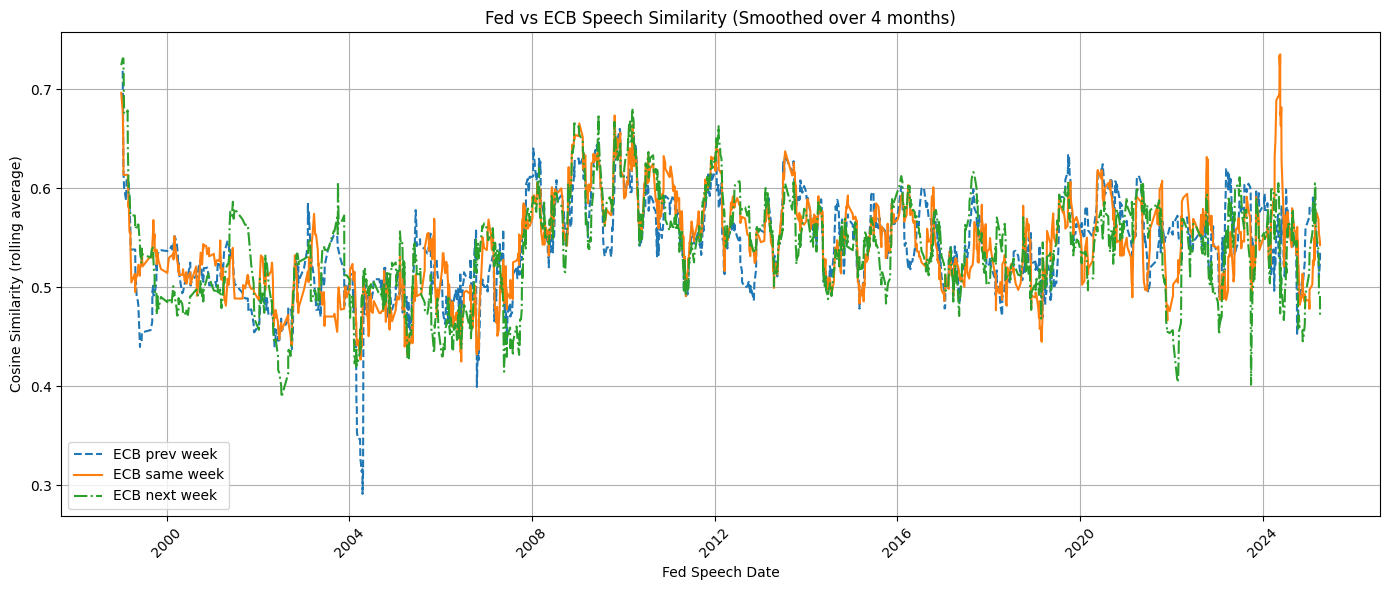

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Average duplicates
avg_df = similarity_df.groupby(["fed_date", "ecb_window"], as_index=False)["similarity_score"].mean()

# Step 2: Pivot to wide format
pivot_df = avg_df.pivot(index="fed_date", columns="ecb_window", values="similarity_score")
pivot_df = pivot_df.sort_index()

# Step 3: Apply rolling average (4 months ≈ 17 weeks)
rolling_df = pivot_df.rolling(window=17, min_periods=1).mean()

# Step 4: Plot smoothed lines
plt.figure(figsize=(14, 6))
if "prev_week" in rolling_df.columns:
    plt.plot(rolling_df.index, rolling_df["prev_week"], label="ECB prev week", linestyle='--')
if "same_week" in rolling_df.columns:
    plt.plot(rolling_df.index, rolling_df["same_week"], label="ECB same week", linestyle='-')
if "next_week" in rolling_df.columns:
    plt.plot(rolling_df.index, rolling_df["next_week"], label="ECB next week", linestyle='-.')

# Labels and formatting
plt.title("Fed vs ECB Speech Similarity (Smoothed over 4 months)")
plt.xlabel("Fed Speech Date")
plt.ylabel("Cosine Similarity (rolling average)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


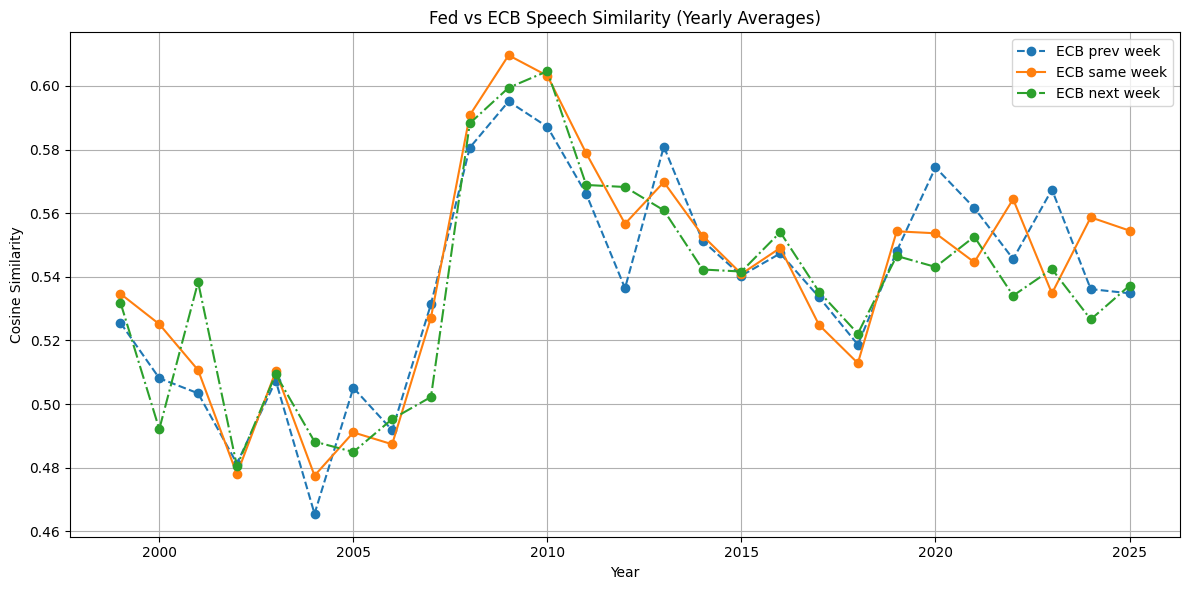

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Average duplicates by date-window pair
avg_df = similarity_df.groupby(["fed_date", "ecb_window"], as_index=False)["similarity_score"].mean()

# Step 2: Extract year from fed_date
avg_df["year"] = pd.to_datetime(avg_df["fed_date"]).dt.year

# Step 3: Compute yearly average similarity per window
yearly_avg = avg_df.groupby(["year", "ecb_window"], as_index=False)["similarity_score"].mean()

# Step 4: Pivot to wide format
pivot_df = yearly_avg.pivot(index="year", columns="ecb_window", values="similarity_score").sort_index()

# Step 5: Plot
plt.figure(figsize=(12, 6))
if "prev_week" in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df["prev_week"], label="ECB prev week", linestyle='--', marker='o')
if "same_week" in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df["same_week"], label="ECB same week", linestyle='-', marker='o')
if "next_week" in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df["next_week"], label="ECB next week", linestyle='-.', marker='o')

# Labels and style
plt.title("Fed vs ECB Speech Similarity (Yearly Averages)")
plt.xlabel("Year")
plt.ylabel("Cosine Similarity")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Add crisis period label
yearly_avg["crisis_period"] = yearly_avg["year"].apply(
    lambda y: "pre-financial crisis" if y < 2009 else "post-financial crisis"
)

In [ ]:
final = yearly_avg.groupby(['crisis_period', 'ecb_window'], as_index = False)["similarity_score"].mean()

In [ ]:
final

,crisis_period,ecb_window,similarity_score
0,post-financial crisis,next_week,0.551760
1,post-financial crisis,prev_week,0.554403
2,post-financial crisis,same_week,0.556680
3,pre-financial crisis,next_week,0.511103
4,pre-financial crisis,prev_week,0.510001
5,pre-financial crisis,same_week,0.513253


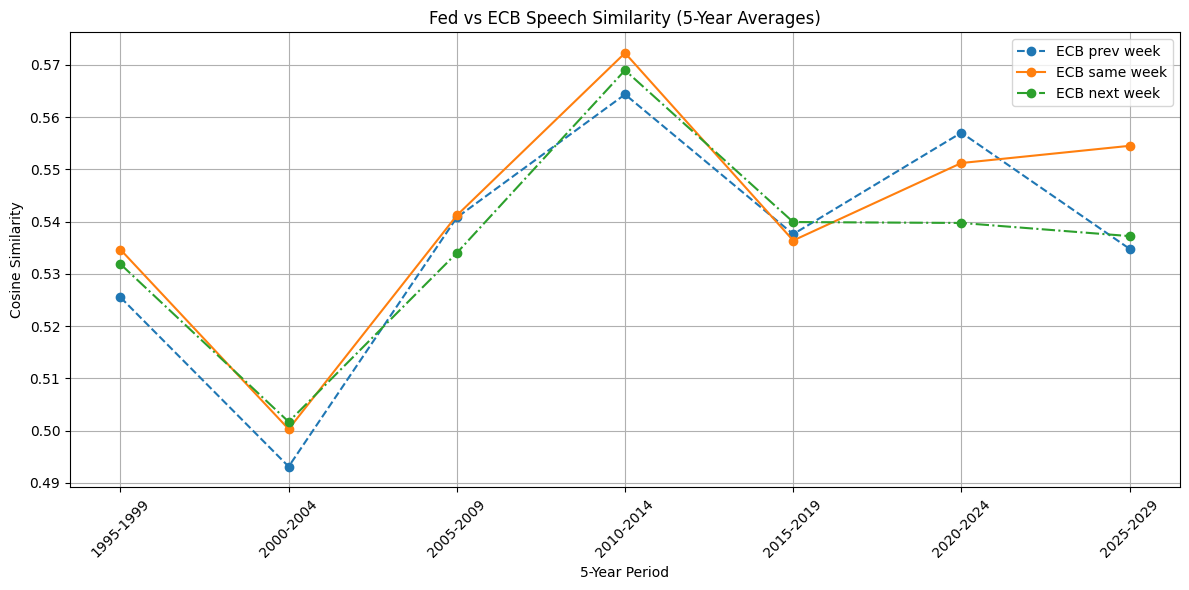

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Create 5-year period label
def get_5yr_period(year):
    start = (year // 5) * 5
    return f"{start}-{start + 4}"

yearly_avg["period"] = yearly_avg["year"].apply(get_5yr_period)

# Step 2: Compute average similarity per 5-year period and ECB window
period_avg = yearly_avg.groupby(["period", "ecb_window"], as_index=False)["similarity_score"].mean()

# Step 3: Pivot to wide format for plotting
pivot_period = period_avg.pivot(index="period", columns="ecb_window", values="similarity_score").sort_index()

# Step 4: Plot
plt.figure(figsize=(12, 6))
if "prev_week" in pivot_period.columns:
    plt.plot(pivot_period.index, pivot_period["prev_week"], label="ECB prev week", linestyle='--', marker='o')
if "same_week" in pivot_period.columns:
    plt.plot(pivot_period.index, pivot_period["same_week"], label="ECB same week", linestyle='-', marker='o')
if "next_week" in pivot_period.columns:
    plt.plot(pivot_period.index, pivot_period["next_week"], label="ECB next week", linestyle='-.', marker='o')

# Formatting
plt.title("Fed vs ECB Speech Similarity (5-Year Averages)")
plt.xlabel("5-Year Period")
plt.ylabel("Cosine Similarity")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



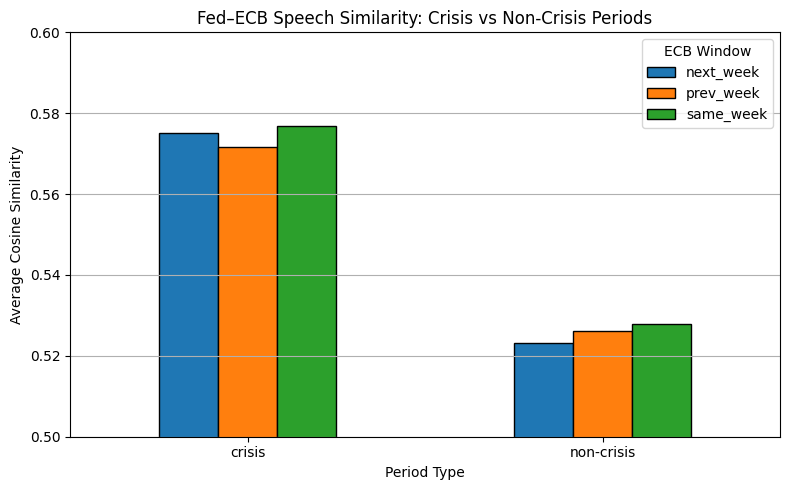

In [ ]:
# Define crisis vs non-crisis years
crisis_years = set([2008, 2009, 2010, 2011, 2012, 2020, 2021])

# Label each row as crisis/non-crisis
yearly_avg["crisis_status"] = yearly_avg["year"].apply(lambda y: "crisis" if y in crisis_years else "non-crisis")

# Compute average similarity for each window in crisis vs non-crisis
crisis_avg = yearly_avg.groupby(["crisis_status", "ecb_window"], as_index=False)["similarity_score"].mean()

# Pivot for plotting
pivot_crisis = crisis_avg.pivot(index="crisis_status", columns="ecb_window", values="similarity_score")

# Bar plot
pivot_crisis.plot(kind="bar", figsize=(8, 5), edgecolor='black')

# Formatting
plt.title("Fed–ECB Speech Similarity: Crisis vs Non-Crisis Periods")
plt.ylabel("Average Cosine Similarity")
plt.xlabel("Period Type")
plt.xticks(rotation=0)
plt.ylim(0.5, 0.6)
plt.grid(axis='y')
plt.legend(title="ECB Window")
plt.tight_layout()
plt.show()
